In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
    
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score





In [2]:
week=pd.read_csv("D:/Machine Learning Practical/Lab Exercises/Lab 3/Program 1/Weekly.csv")
week

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [3]:
#Checking if null or not
week.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [4]:
#Checking info
week.info()

#We have one categorical variable in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [5]:
#Getty dummy variable for categorical variable
week = pd.get_dummies(week).drop('Direction_Down', axis=1)
week.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

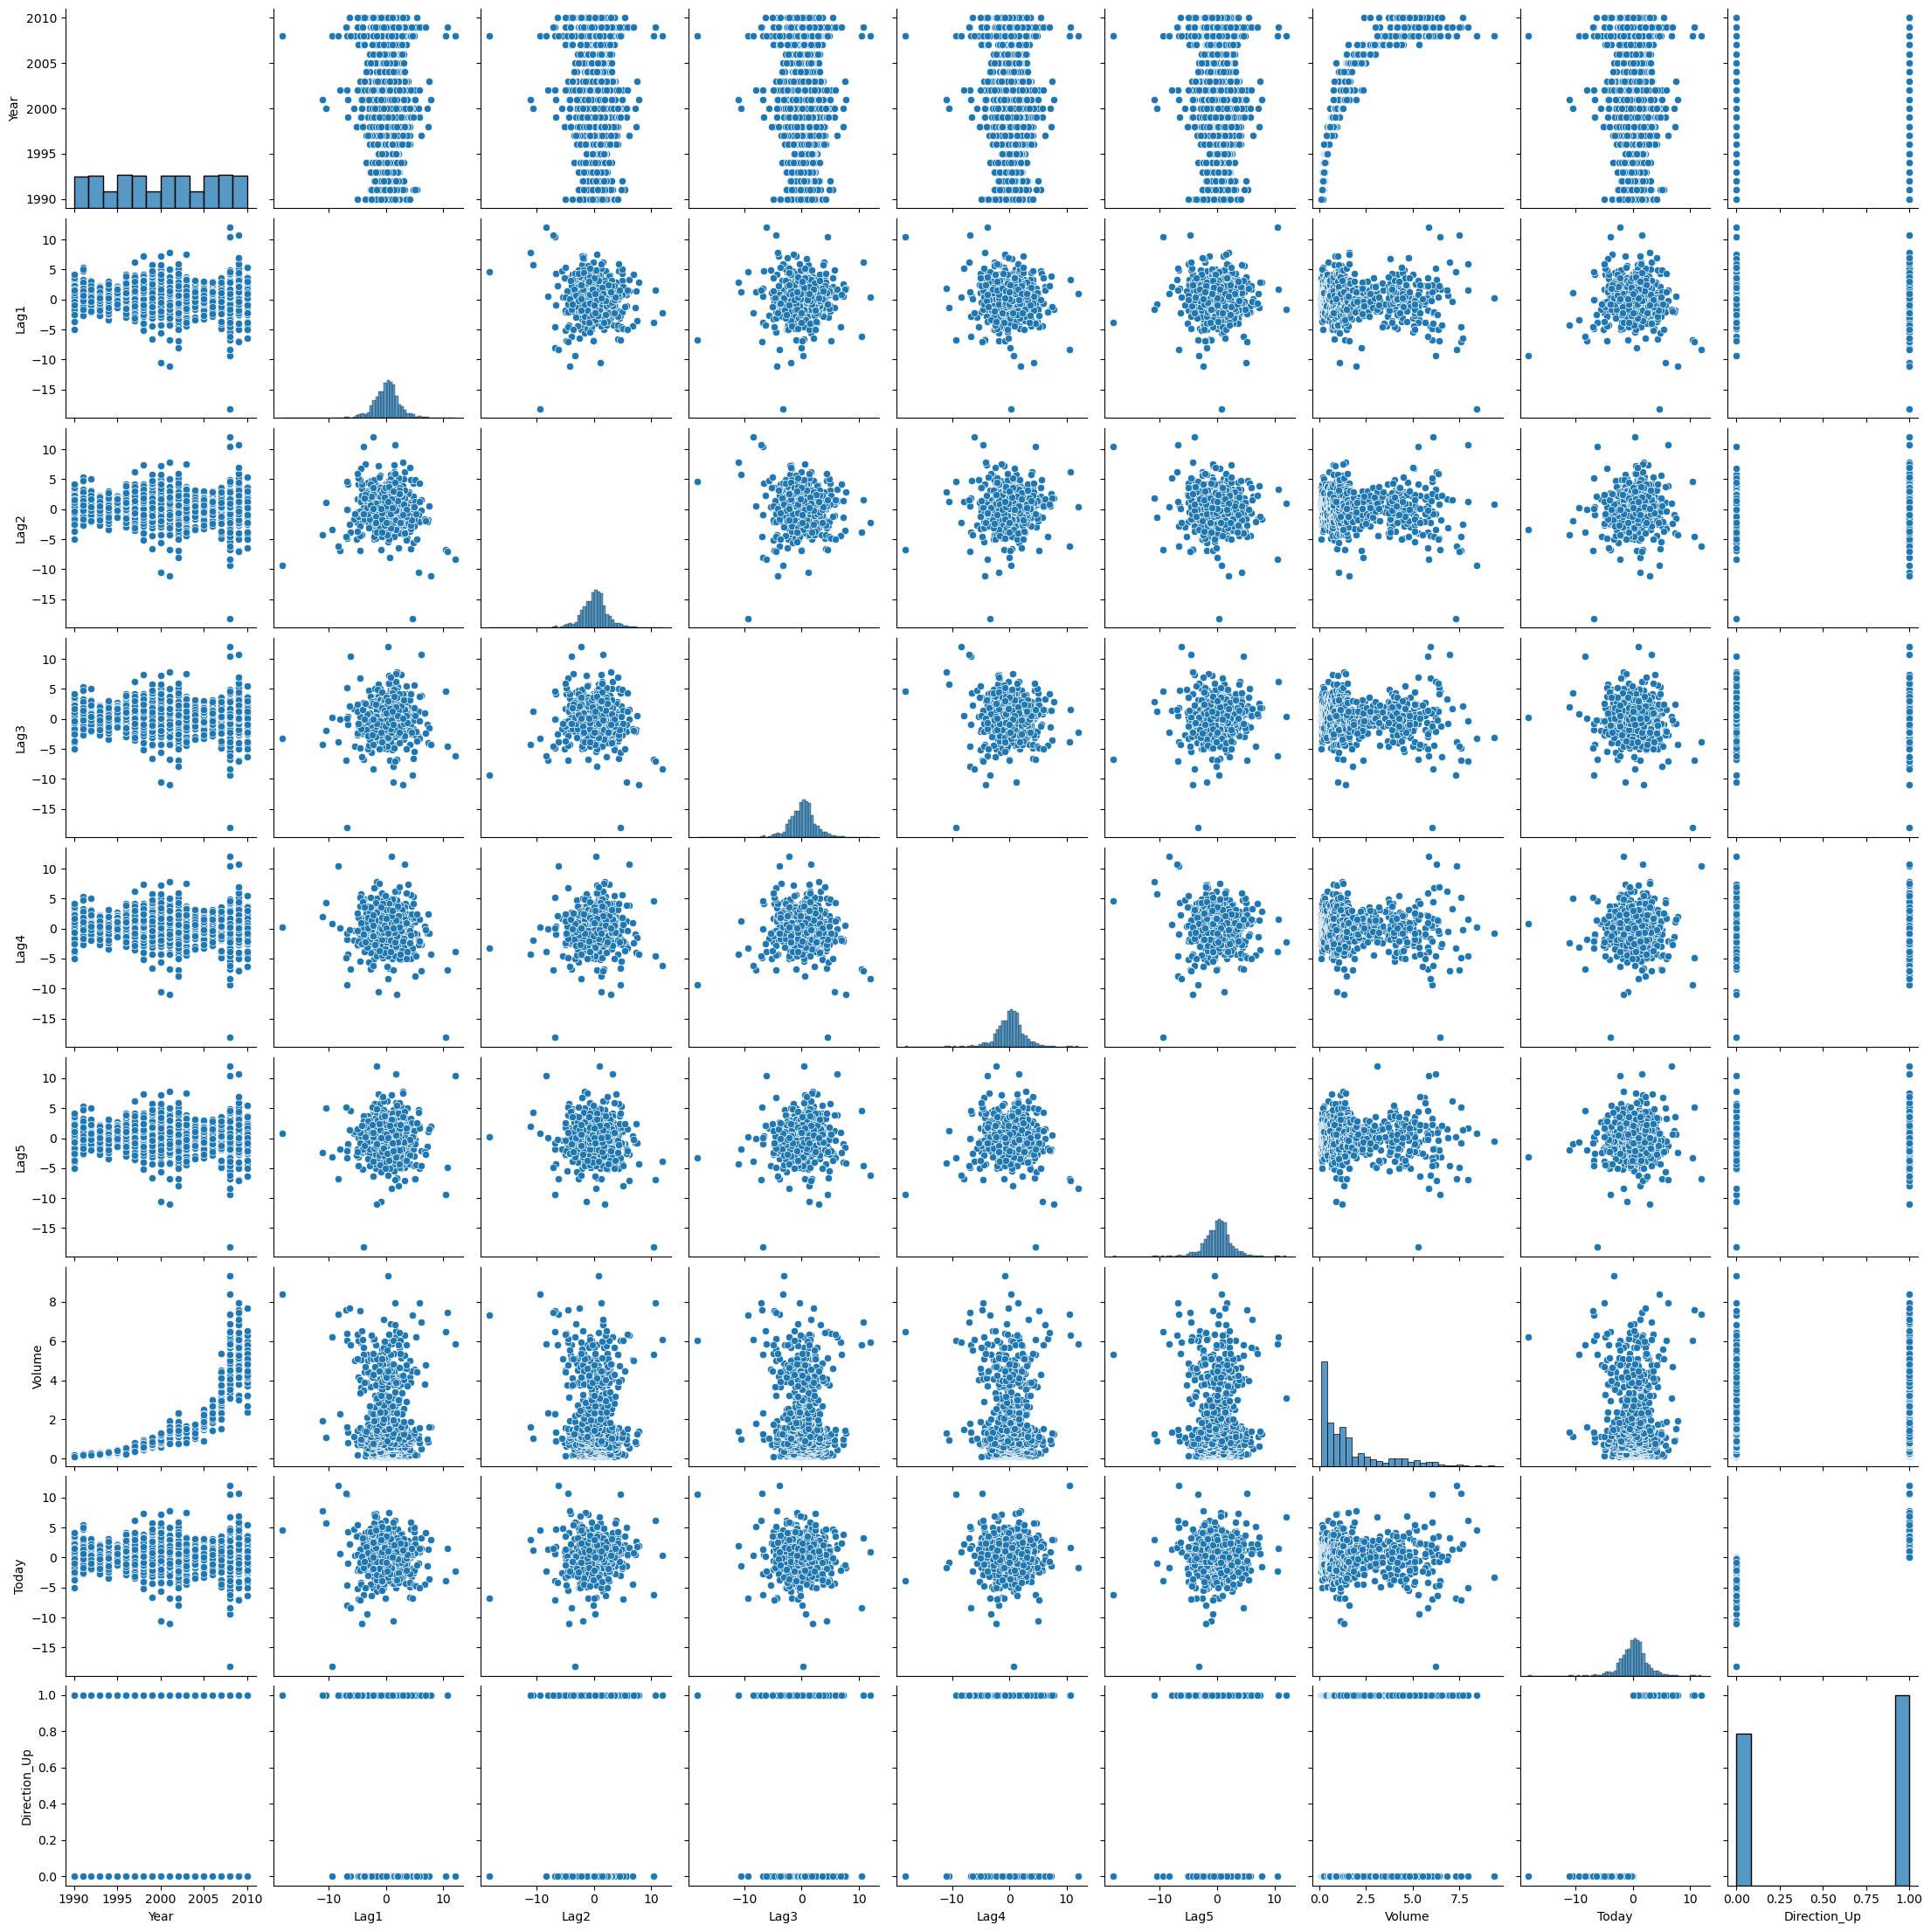

In [6]:
#Getting a Scatter plot 
pair=sns.pairplot(week)
plt.show(pair)

In [7]:
#Interpretation: We can't observe much of linearity using the scatter plot, we can only see clusters and LOGISTIC models.

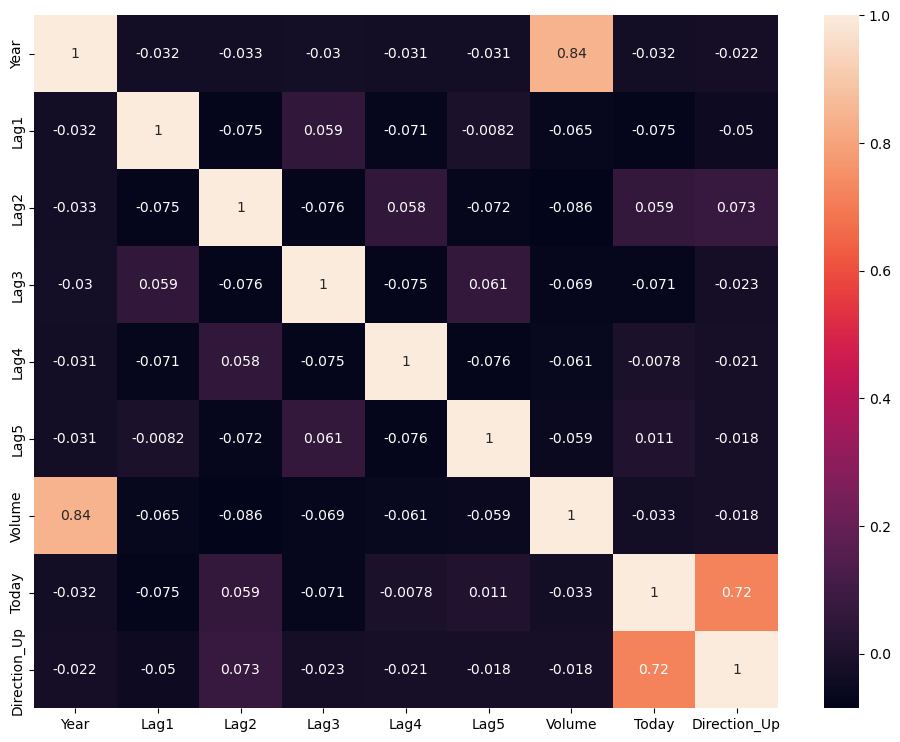

In [8]:
#Correlation Matrix
plt.figure(figsize=(12,9))
heat=sns.heatmap(week.corr(),annot=True)
plt.show(heat)


In [9]:
#Interpretation: We observe that there is high correlation between YEAR AND VOLUME. Also between TODAY and DIRECTION_UP.

### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [10]:
#Splitting data into training and testing

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X=pd.DataFrame(week[["Lag1","Lag2","Lag3","Lag4","Lag5","Volume"]])
y=pd.DataFrame(week["Direction_Up"])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

#FITTING THE MODEL
fit=LogisticRegression().fit(X_train, y_train)
predicted = fit.predict(X_test)
predicted

C:\Users\jesto\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
#Fitting the model using statsmodels.api
model = sm.Logit(y_train, X_train)
result=model.fit()

#summary
result.summary()


Optimization terminated successfully.
         Current function value: 2.034788
         Iterations 4


C:\Users\jesto\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\jesto\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\jesto\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                  762
Model:                          Logit   Df Residuals:                      756
Method:                           MLE   Df Model:                            5
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                     inf
Time:                        20:35:39   Log-Likelihood:                -1550.5
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0167      0.033     -0.512      0.609      -0.081       0.047
Lag2           0.0316      0.033      0.965      0.335      -0.033       0.096
Lag3          -0.0160      0.032     -0.503      0.615      -0.078       0.046
Lag4          -0.0101      0.031     -0.324      0.746      -0.071       0.051
Lag5          -0.0200      0.031     -0.650      0.516      -0.080       0.040
Volume         0.0763      0.033      2.334      0.020       0.012       0.140
==============================================================================
"""

##### Interpreation

Here we see that only VOLUME is statistically significant.

### c. Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [113]:
#CONFUSION MATRIX
conf=confusion_matrix(y_test, predicted)
conf

array([[  6, 136],
       [  3, 182]], dtype=int64)

In [110]:
#Overall fraction of correct prediction (ACCURACY=TN+TP/TP+TN+FP+FN)
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

0.5749235474006116

Interpretation: We can say that the model correctly predicted the results only 57.4% of the time.

In [111]:
#Sensitivity = TP / (TP + FN)

6/(6+3)

#CONCLUSION: Therefore 66.6% of the ACTUAL direction UP where correctly predicted as such

0.6666666666666666

In [112]:
#Specificity = TN / (FP + TN)

182/(182+136)
#CONCLUSION: Therefore 57.2% of the ACTUAL direction DOWN where correctly predicted as such

0.5723270440251572

### d. Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [137]:
#Creating training and testing data

b = week.index[week['Year'] < 2009]
week_train = week.iloc[b] #dataframe with years less than 2008
week_test  = week.drop(b) #dataframe with years more than 2009

y_test1 = pd.DataFrame(week_test['Direction_Up'])
y_train= pd.DataFrame(week_train['Direction_Up'])

x_test=pd.DataFrame(week_test['Lag2'])
x_train=pd.DataFrame(week_train['Lag2'])


In [138]:
#Fitting the model
model1_fit=sm.Logit(y_train,x_train).fit()

#prediction (we use logistric regression function)
fit1=LogisticRegression().fit(x_train, y_train)
y_pred = fit1.predict(x_test)

#confusion matrix
conf1=confusion_matrix(y_test1,y_pred)
conf1

Optimization terminated successfully.
         Current function value: 6.185218
         Iterations 4


C:\Users\jesto\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 9, 34],
       [ 5, 56]], dtype=int64)

In [140]:
#Overall fraction of correct prediction (ACCURACY=TN+TP/TP+TN+FP+FN)
from sklearn.metrics import accuracy_score

accuracy_score(y_test1,y_pred)

#Interpretation: We can say that the model correctly predicted the results only 62.5% of the time.

0.625